In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import scanpy as sc

In [2]:
adata = sc.read_h5ad("Greenham/Data/Greenham.h5ad")
points = adata.obsm['X_umap']

In [3]:
initial_membership = list(range(points.shape[0])) # Initial membership, assuming all start in cluster 0


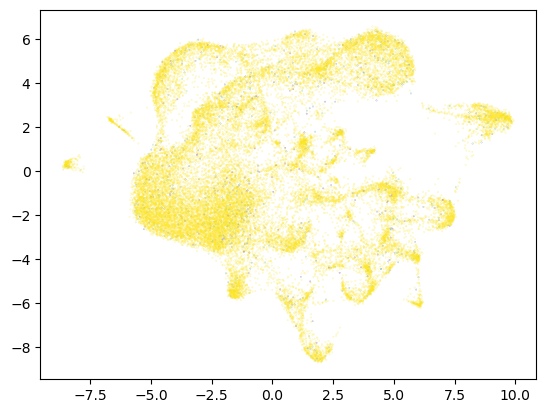

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Example data
np.random.seed(0)  # For reproducibility
# points = np.random.rand(30000, 2) * 10  # 30,000 random 2D coordinates in the range [0, 10]
# initial_membership = np.random.randint(0, 10, 30000)  # Random initial cluster memberships between 0 and 9

# Function to read membership changes from a file
def read_membership_changes(filename):
    membership_changes = []
    with open(filename, 'r') as file:
        step_changes = []
        for line in file:
            line = line.strip()
            if line.startswith('#'):
                if step_changes:
                    membership_changes.append(step_changes)
                    step_changes = []
            elif line:
                index, new_cluster = map(int, line.split())
                step_changes.append((index, new_cluster))
        if step_changes:
            membership_changes.append(step_changes)
    return membership_changes

# Load membership changes from the file
filename = '/Users/henryhollis/Desktop/changes.txt'  # Replace with your actual file path
membership_changes = read_membership_changes(filename)

# Use a colormap to dynamically assign colors
cmap = plt.get_cmap('viridis')  # 'tab20' is good for up to 20 discrete clusters
norm = plt.Normalize(vmin=0, vmax=1000)  # Normalize cluster indices to colormap range

# Initialize plot
fig, ax = plt.subplots()
sc = ax.scatter(points[:, 0], points[:, 1], c=cmap(norm(initial_membership)), s = 1/72)

current_membership = initial_membership.copy()

def animate(i):
    for index, new_cluster in membership_changes[i]:
        current_membership[index] = new_cluster
    sc.set_color(cmap(norm(current_membership)))
    return sc,

ani = animation.FuncAnimation(fig, animate, frames=len(membership_changes), interval=1000, blit=True)

# Display in Jupyter Notebook
HTML(ani.to_jshtml())

